# Some sample code for projects
- data needed
  - covid cases
  - crime cases
  - online classes duration and quality
  - stocks
  - retail
  
[Download](https://github.com/WeileiZeng/programming-camp/archive/master.zip) this notebook with all data files

## COVID 19 data

In [30]:
# covid data
# filename: us.csv
# source: https://github.com/nytimes/covid-19-data

import pandas as pd
df=pd.read_csv('data/us.csv',index_col=['date'])
print(df.head())

            cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0


1

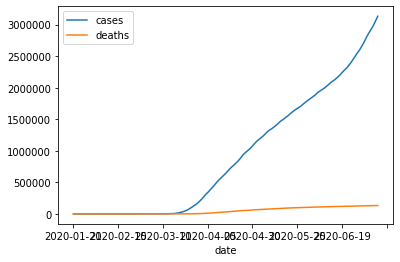

In [14]:
df.plot()

In [8]:
t_range = df['date']

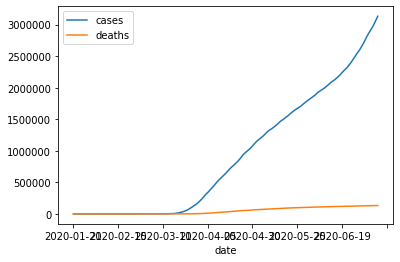

In [9]:
df.plot()

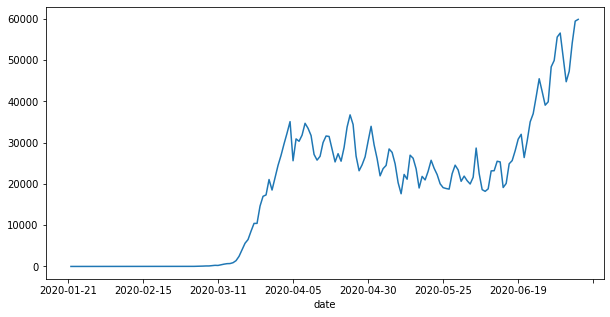

In [39]:
fig1, ax1 = plt.subplots(figsize=(10,5))
df["cases"].diff().plot(ax=ax1)

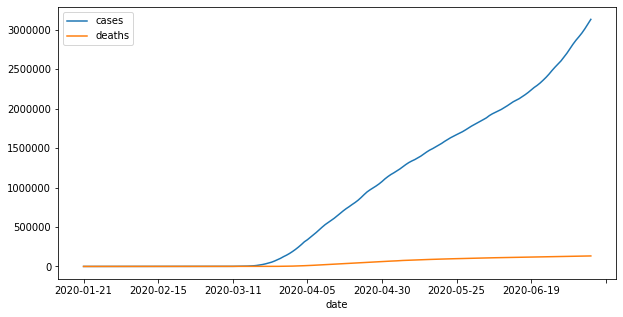

In [40]:
#plot data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#%matplotlib inline
fig, ax = plt.subplots(figsize=(10,5))
#df.set_index('date',inplace=True)
df.plot(kind=ax=ax)



other resources

https://coronavirus.1point3acres.com/en


## stocks

- filename: dow jones: data-EKHTG.csv
- filename: nasdaq: data-APZBu.csv

- source:
https://www.marketplace.org/2020/05/01/how-the-markets-are-reacting-to-covid-19/



In [102]:
data=pd.read_csv('data/data-EKHTG.csv',index_col=['Date'])
data.head()

Close
Date               
5/2/2020   23749.76
5/1/2020   23723.69
4/30/2020  24345.72
4/29/2020  24633.86
4/28/2020  24101.55

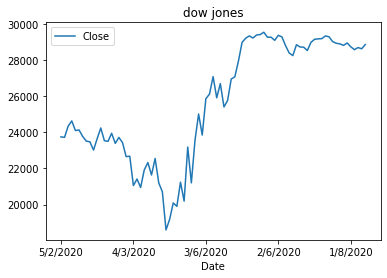

In [104]:
data.plot(title='dow jones')

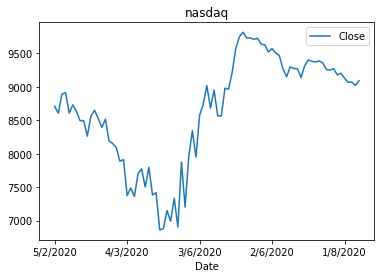

In [105]:
data=pd.read_csv('data/data-APZBu.csv',index_col=['Date'])
data.plot(title='nasdaq')

In [1]:
# pip install pandas_datareader
#from pandas.util.testing import assert_frame_equal
import pandas_datareader as pdr

/Users/weileizeng/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
alibaba = pdr.get_data_yahoo("BABA")
#alibaba.head()
msft = pdr.get_data_yahoo("MSFT")
#msft.head()
zoom = pdr.get_data_yahoo("ZM")

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-07-20  47.130001  46.439999  46.650002  46.919998  30631900.0  42.463726
2015-07-21  47.330002  46.480000  46.779999  47.279999  42781900.0  42.789539
2015-07-22  46.930000  45.200001  45.439999  45.540001  59152400.0  41.214806
2015-07-23  46.230000  45.099998  45.270000  46.110001  33934000.0  41.730663
2015-07-24  46.320000  45.799999  45.910000  45.939999  32333200.0  41.576809

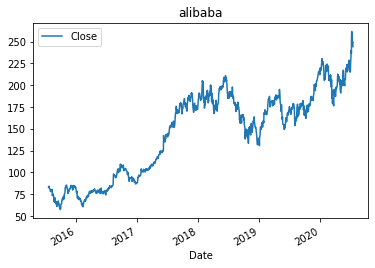

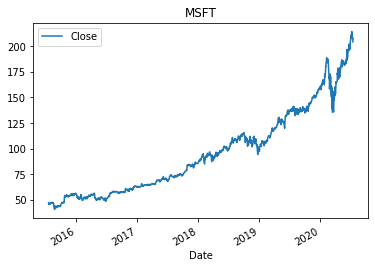

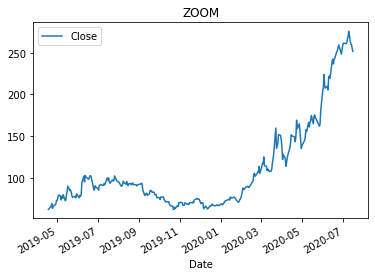

In [9]:
alibaba.plot(title="alibaba", y = "Close")
msft.plot(title="MSFT", y = 'Close')
zoom = pdr.get_data_yahoo("ZM")
zoom.plot(title="ZOOM",y='Close')

## twitter data
- filename: 2020-07-06_top1000bigrams.csv

In [90]:
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
#tw.set_index('term',inplace=True)
a=tw[tw['term']=='covid']
b=a.set_index(pd.Index(range(a.shape[0])))
b.loc[0,'frequency']
tw.head(30)

term  frequency
0       coronavirus     328383
1             covid     203800
2                19     193076
3           covid19     167520
4               NaN      62057
5            people      46485
6               amp      44220
7             cases      39189
8               new      38259
9               via      35970
10            trump      35641
11               us      35339
12         pandemic      32337
13           deaths      30309
14            virus      28311
15            china      25257
16             news      24841
17         lockdown      24658
18             like      23712
19              one      21695
20              000      21681
21              get      21323
22              may      20165
23            world      19933
24  realdonaldtrump      19843
25             time      18864
26            death      18346
27             2020      17171
28           health      17121
29             know      17103

In [99]:
import pandas as pd
from pandas import Series, DataFrame

#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
#tw.head(20)

# read all files
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)
folder='data/covid-term/'

for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:
            f=0
        else:
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
    

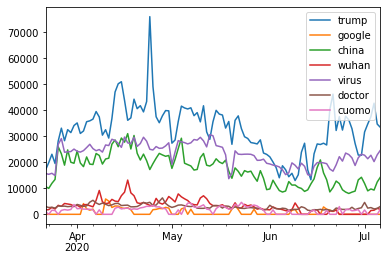

In [100]:
df.plot()

In [81]:
df

covid  coronavirus    trump
2020-03-22   67037.0     223843.0  17061.0
2020-03-23   84031.0     245729.0  19862.0
2020-03-24   91123.0     254575.0  23074.0
2020-03-25   90652.0     253734.0  19520.0
2020-03-26  128786.0     340182.0  28143.0
...              ...          ...      ...
2020-07-02  212170.0     212732.0  34686.0
2020-07-03  206981.0     217863.0  37523.0
2020-07-04  164436.0     189310.0  42682.0
2020-07-05  181446.0     202376.0  34663.0
2020-07-06  214526.0     208812.0  33407.0

[107 rows x 3 columns]

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases